In [1]:
from google.colab import files
!rm -r *
!mkdir data
!ls

data


In [2]:
files.upload()
!ls

Saving fc.txt to fc.txt
data  fc.txt


In [0]:
!mv fruits fruits.txt

In [0]:
f = open("fc.txt","r")
classes = f.readlines()
f.close()

In [0]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [6]:
for c in classes:
  print(c)

apple
bat
bear
bird
watermelon
camel
carrot
cat
cow
crab
crocodile
whale
dog
duck
elephant
fish
flamingo
frog
grapes
hedgehog
horse
kangaroo
lobster
monkey
mosquito
mouse
onion
owl
panda
parrot
peanut
pear
peas
penguin
pig
pineapple
pizza
rabbit
raccoon
rhinoceros
scorpion
sea_turtle
shark
sheep
snail
snake
spider


In [0]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [8]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bear.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/watermelon.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/carrot.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cow.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crab.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crocodile.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/whale.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy


In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 8000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [14]:
print(len(x_train))
!ls -all

300800
total 24
drwxr-xr-x 1 root root 4096 Feb  6 18:54 .
drwxr-xr-x 1 root root 4096 Feb  6 18:51 ..
drwxr-xr-x 4 root root 4096 Feb  4 17:13 .config
drwxr-xr-x 2 root root 4096 Feb  6 18:56 data
-rw-r--r-- 1 root root  316 Feb  6 18:54 fc.txt


elephant


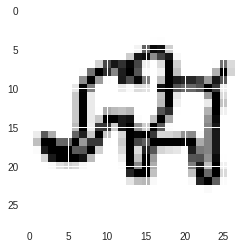

In [15]:
import matplotlib.pyplot as plt

from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [0]:
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(47, activation='softmax')) 

adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
__________

In [22]:
history = model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=10)

Train on 270720 samples, validate on 30080 samples
Epoch 1/10
 - 28s - loss: 2.0826 - top_k_categorical_accuracy: 0.7378 - val_loss: 1.5940 - val_top_k_categorical_accuracy: 0.8417
Epoch 2/10
 - 19s - loss: 1.4664 - top_k_categorical_accuracy: 0.8585 - val_loss: 1.3749 - val_top_k_categorical_accuracy: 0.8706
Epoch 3/10
 - 13s - loss: 1.2972 - top_k_categorical_accuracy: 0.8815 - val_loss: 1.2687 - val_top_k_categorical_accuracy: 0.8851
Epoch 4/10
 - 13s - loss: 1.2054 - top_k_categorical_accuracy: 0.8932 - val_loss: 1.2149 - val_top_k_categorical_accuracy: 0.8932
Epoch 5/10
 - 19s - loss: 1.1453 - top_k_categorical_accuracy: 0.9003 - val_loss: 1.1604 - val_top_k_categorical_accuracy: 0.8991
Epoch 6/10
 - 13s - loss: 1.0965 - top_k_categorical_accuracy: 0.9063 - val_loss: 1.1303 - val_top_k_categorical_accuracy: 0.9025
Epoch 7/10
 - 13s - loss: 1.0624 - top_k_categorical_accuracy: 0.9101 - val_loss: 1.1091 - val_top_k_categorical_accuracy: 0.9062
Epoch 8/10
 - 21s - loss: 1.0319 - top_

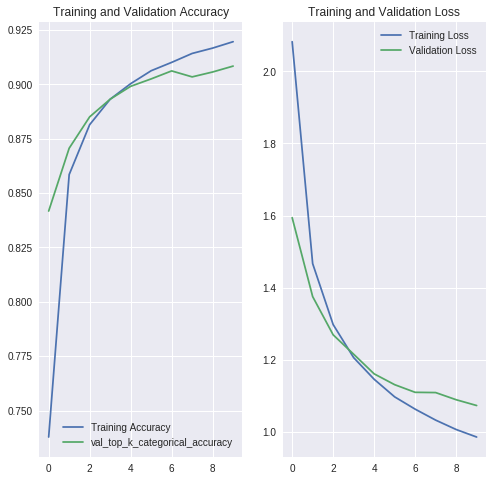

In [23]:
top_k_categorical_accuracy = history.history['top_k_categorical_accuracy']
val_acc = history.history['val_top_k_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, top_k_categorical_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='val_top_k_categorical_accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 90.65%


['mouse', 'crocodile', 'fish', 'shark', 'whale']


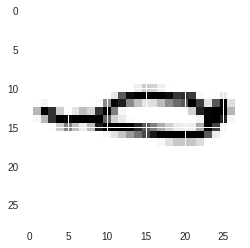

In [25]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [0]:
model.save('keras.h5')

In [0]:
files.download('keras.h5')